# Census Data

In [1]:
# Dependencies
import requests
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np
import scipy.stats as stats

from config import census_key

In [2]:
#employed civilians(B23025_004E), unemployed civilians(B23025_005E), employable civilians(B23025_003E), 
#median household income(B19013_001E), per capita income(B19301_001E), 
#Total population(B01003_001E),
#Estimate!!Total:!!Moved from different state(B07001_065E)

## The Census Data By States

In [3]:
# get the census data by state
years = [2016, 2017, 2018, 2019, 2020, 2021]

census_by_states_df_list = []

states = []
total_population = []
totoal_migration = []
employable_civilians = []
employed_civilians = []
employed_rate = []
unemployed_civilians = []
median_household_income = []
per_capita_income = []


for year in years:
    url = f"https://api.census.gov/data/{year}/acs/acs5?get=NAME,B01003_001E,B07001_065E,B23025_003E,B23025_004E,B23025_005E,B19013_001E,B19301_001E&for=state:*&key={census_key}"
    response = requests.get(url)
    response_json = response.json()
    for i in range(1,len(response_json)):
        states.append(response_json[i][0])
        total_population.append(response_json[i][1])
        totoal_migration.append(response_json[i][2])
        employable_civilians.append(response_json[i][3])
        employed_civilians.append(response_json[i][4])
        employed_rate.append(int(response_json[i][4]) / int(response_json[i][1]) * 100)
        unemployed_civilians.append(response_json[i][5])
        median_household_income.append(response_json[i][6])
        per_capita_income.append(response_json[i][7])

    state_census_df = pd.DataFrame({
        "State":states,
        f"{year} Total Population":total_population,
        f"{year} Total Migration": totoal_migration,
        f"{year} Employable Civilians": employable_civilians,
        f"{year} Employed Civilians": employed_civilians,
        f"{year} Employed Rate (%)": employed_rate,
        f"{year} Unemployed Civilians": unemployed_civilians,
        f"{year} Median Household Income": median_household_income,
        f"{year} Per Capita Income":per_capita_income
        })
    census_by_states_df_list.append(state_census_df)
    state_census_df = 0
    states = []
    total_population = []
    totoal_migration = []
    employable_civilians = []
    employed_civilians = []
    employed_rate = []
    unemployed_civilians = []
    median_household_income = []
    per_capita_income = []



In [4]:
#merge the census data by state by year
merged_census_state_df1 = pd.merge(census_by_states_df_list[0], census_by_states_df_list[1], how="right", on=["State", "State"], sort=True)
merged_census_state_df2 = pd.merge(merged_census_state_df1, census_by_states_df_list[2], how="right", on=["State", "State"], sort=True)
merged_census_state_df3 = pd.merge(merged_census_state_df2, census_by_states_df_list[3], how="right", on=["State", "State"], sort=True)
merged_census_state_df4 = pd.merge(merged_census_state_df3, census_by_states_df_list[4], how="right", on=["State", "State"], sort=True)
merged_census_state_df5 = pd.merge(merged_census_state_df4, census_by_states_df_list[5], how="right", on=["State", "State"], sort=True)

In [5]:
# clean up the state census data
states = merged_census_state_df5["State"]
droped_df = merged_census_state_df5.drop(columns="State")
droped_df.fillna(0, inplace=True)
clean_type_droped_df = droped_df.astype(int)



In [6]:
# add the states columns to the cleaned type dataframe
clean_census_by_state_df = pd.concat([states, clean_type_droped_df], axis=1)

# clean the dataframe by dropping the states that are not state
clean_census_by_state_df1 = clean_census_by_state_df.drop([8, 39])

# reset the index of the dataframe
clean_census_by_state_df2 = clean_census_by_state_df1.reset_index(drop=True)

#output the cleaned census by state dataframe as csv file
clean_census_by_state_df2.to_csv("Output/census_by_states.csv") 

In [7]:
# show the cleaned census by state table
clean_census_by_state_df2

,State,2016 Total Population,2016 Total Migration,2016 Employable Civilians,2016 Employed Civilians,2016 Employed Rate (%),2016 Unemployed Civilians,2016 Median Household Income,2016 Per Capita Income,2017 Total Population,...,2020 Median Household Income,2020 Per Capita Income,2021 Total Population,2021 Total Migration,2021 Employable Civilians,2021 Employed Civilians,2021 Employed Rate (%),2021 Unemployed Civilians,2021 Median Household Income,2021 Per Capita Income
0,Alabama,4841164,108414,2226504,2042025,42,184479,44758,24736,4850771,...,52035,28934,4997675,109257,2298013,2173597,43,124416,54943,30458
1,Alaska,736855,33458,384093,353954,48,30139,74444,34191,738565,...,77790,37094,735951,29528,363718,338664,46,25054,80287,39236
2,Arizona,6728577,245859,3129344,2879372,42,249972,51340,26686,6809946,...,61529,32340,7079203,259522,3401906,3210791,45,191115,65913,34644
3,Arkansas,2968472,73632,1359742,1266552,42,93190,42336,23401,2977944,...,49475,27724,3006309,71002,1384596,1310863,43,73733,52123,29210
4,California,38654206,501384,19260868,17577142,45,1683726,63783,31458,38982847,...,78672,38576,39455353,478535,19980462,18676721,47,1303741,84097,41276
5,Colorado,5359295,213586,2864224,2692529,50,171695,62520,33230,5436519,...,75231,39545,5723176,230815,3120868,2975830,51,145038,80184,42807
6,Connecticut,3588570,80187,1948693,1793688,49,155005,71755,39906,3594478,...,79855,45668,3605330,89780,1940626,1822995,50,117631,83572,47869
7,Delaware,934695,36492,471961,438292,46,33669,61017,31118,943732,...,69110,36574,981892,36915,492450,464457,47,27993,72724,38917
8,Florida,19934451,558705,9557443,8755427,43,802016,48900,27598,20278447,...,57703,32848,21339762,604970,10377036,9824911,46,552125,61777,35216
9,Georgia,10099320,282247,4908225,4489112,44,419113,51037,26678,10201635,...,61224,32427,10625615,277486,5274596,4983753,46,290843,65030,34516


## The Average Number through The Year of The Census Data by States

In [8]:
# get the value for avg df
sum_total_population = clean_type_droped_df["2016 Total Population"] + clean_type_droped_df["2017 Total Population"] + clean_type_droped_df["2018 Total Population"] + clean_type_droped_df["2019 Total Population"] + clean_type_droped_df["2020 Total Population"] + clean_type_droped_df["2021 Total Population"]
avg_total_population = (sum_total_population/6).round(2)

sum_total_migration = clean_type_droped_df["2016 Total Migration"] + clean_type_droped_df["2017 Total Migration"] + clean_type_droped_df["2018 Total Migration"] + clean_type_droped_df["2019 Total Migration"] + clean_type_droped_df["2020 Total Migration"] + clean_type_droped_df["2021 Total Migration"]
avg_total_migration = (sum_total_migration/6).round(2)

sum_employable_civilians = clean_type_droped_df["2016 Employable Civilians"] + clean_type_droped_df["2017 Employable Civilians"] + clean_type_droped_df["2018 Employable Civilians"] + clean_type_droped_df["2019 Employable Civilians"] + clean_type_droped_df["2020 Employable Civilians"] + clean_type_droped_df["2021 Employable Civilians"]
avg_employable_civilians = (sum_employable_civilians/6).round(2)

sum_employed_civilians = clean_type_droped_df["2016 Employed Civilians"] + clean_type_droped_df["2017 Employed Civilians"] + clean_type_droped_df["2018 Employed Civilians"] + clean_type_droped_df["2019 Employed Civilians"] + clean_type_droped_df["2020 Employed Civilians"] + clean_type_droped_df["2021 Employed Civilians"]
avg_employed_civilians = (sum_employed_civilians/6).round(2)

sum_employed_rate = clean_type_droped_df["2016 Employed Rate (%)"] + clean_type_droped_df["2017 Employed Rate (%)"] + clean_type_droped_df["2018 Employed Rate (%)"] + clean_type_droped_df["2019 Employed Rate (%)"] + clean_type_droped_df["2020 Employed Rate (%)"] + clean_type_droped_df["2021 Employed Rate (%)"]
avg_employed_rate = (sum_employed_rate/6).round(2)

sum_median_household_income = clean_type_droped_df["2016 Median Household Income"] + clean_type_droped_df["2017 Median Household Income"] + clean_type_droped_df["2018 Median Household Income"] + clean_type_droped_df["2019 Median Household Income"] + clean_type_droped_df["2020 Median Household Income"] + clean_type_droped_df["2021 Median Household Income"]
avg_median_household_income = (sum_median_household_income/6).round(2)

sum_per_capita_income = clean_type_droped_df["2016 Per Capita Income"] + clean_type_droped_df["2017 Per Capita Income"] + clean_type_droped_df["2018 Per Capita Income"] + clean_type_droped_df["2019 Per Capita Income"] + clean_type_droped_df["2020 Per Capita Income"] + clean_type_droped_df["2021 Per Capita Income"]
avg_per_capita_income = (sum_per_capita_income/6).round(2)

In [9]:
# get the avg by state dataframe
avg_by_state_df = pd.DataFrame({
    "State": merged_census_state_df5["State"],
    "Average Total Population":avg_total_population,
    "Average Total Migration": avg_total_migration,
    "Average Employable Civilians": avg_employable_civilians,
    "Average Employed Civilians": avg_employed_civilians,
    "Average Employed Rate (%)": avg_employed_rate,
    "Average Median Household Income": avg_median_household_income,
    "Average Per Capita Income":avg_per_capita_income
})

# clean the dataframe by dropping the states that are not state
avg_by_state_df1 = avg_by_state_df.drop([8, 39])

# reset the index of the dataframe
avg_by_state_df2 = avg_by_state_df1.reset_index(drop=True)

# output the average data by state as csv file
avg_by_state_df2.to_csv("Output/avg_by_state.csv")

In [10]:
# show the average data by state table
avg_by_state_df2

,State,Average Total Population,Average Total Migration,Average Employable Civilians,Average Employed Civilians,Average Employed Rate (%),Average Median Household Income,Average Per Capita Income
0,Alabama,4887287.67,110104.33,2240805.17,2094201.50,42.50,49538.33,27441.33
1,Alaska,737324.17,31675.00,375521.00,347846.83,46.83,77165.00,36374.50
2,Arizona,6964795.67,257898.17,3284834.67,3072755.50,43.50,57908.33,30265.50
3,Arkansas,2992439.83,72429.50,1371577.00,1293242.00,42.67,46845.00,26162.17
4,California,39145114.33,498871.17,19670558.67,18299154.17,46.33,73364.00,36069.00
5,Colorado,5557567.67,223878.33,2998742.17,2851574.17,50.67,70755.83,37511.33
6,Connecticut,3585917.50,82412.00,1937887.00,1809229.17,49.83,77252.17,43726.67
7,Delaware,955790.17,36757.33,480487.17,451283.33,46.67,66633.50,34778.83
8,Florida,20711559.83,581609.50,9971117.00,9338817.50,44.50,54698.33,31042.00
9,Georgia,10357413.33,280087.83,5088767.83,4757525.00,45.33,57441.17,30371.00


## The Census Data by The US

In [11]:
# get the census data by us
years = [2016, 2017, 2018, 2019, 2020, 2021]

total_population = []
totoal_migration = []
employable_civilians = []
employed_civilians = []
unemployed_civilians = []
median_household_income = []
per_capita_income = []

for year in years:
    url = f"https://api.census.gov/data/{year}/acs/acs5?get=NAME,B01003_001E,B07001_065E,B23025_003E,B23025_004E,B23025_005E,B19013_001E,B19301_001E&for=us:*&key={census_key}"
    response = requests.get(url)
    response_json = response.json()
    total_population.append(response_json[1][1])
    totoal_migration.append(response_json[1][2])
    employable_civilians.append(response_json[1][3])
    employed_civilians.append(response_json[1][4])
    unemployed_civilians.append(response_json[1][5])
    median_household_income.append(response_json[1][6])
    per_capita_income.append(response_json[1][7])

us_census_df = pd.DataFrame({
    "Year":years,
    "Total Population":total_population,
    "Total Migration": totoal_migration,
    "Employable Civilians": employable_civilians,
    "Employed Civilians": employed_civilians,
    "Employed Rate (%)": "",
    "Unemployed Civilians": unemployed_civilians,
    "Median Household Income": median_household_income,
    "Per Capita Income":per_capita_income
              })


In [12]:
# add the number for employed rate
for i in range(0, len(us_census_df)):
    us_census_df.iloc[i, 5] = int(us_census_df.iloc[i, 4]) / int(us_census_df.iloc[i, 1]) * 100

In [13]:
us_census_df1 = us_census_df.astype(int)

In [14]:
# output the us census data
us_census_df1.to_csv("Output/us_census.csv") 

In [15]:
# show the us census table
us_census_df1

,Year,Total Population,Total Migration,Employable Civilians,Employed Civilians,Employed Rate (%),Unemployed Civilians,Median Household Income,Per Capita Income
0,2016,318558162,7282348,159807099,148001326,46,11805773,55322,29829
1,2017,321004407,7354769,161159470,150599165,46,10560305,57652,31177
2,2018,322903030,7443306,162248196,152739884,47,9508312,60293,32621
3,2019,324697795,7475038,163555585,154842185,47,8713400,62843,34103
4,2020,326569308,7428810,164759496,155888980,47,8870516,64994,35384
5,2021,329725481,7497058,166672597,157510982,47,9161615,69021,37638


## Create Plots to Show the Corelation between the Migration and Employment Rate, and between the Migration and Poverty

In [16]:
# Define a function to create Linear Regression plots
def linear_regression(x_value, y_value, xlabel, ylabel,title, outputname):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_value,y_value)
    plt.plot(x_value, regress_values, "r-")
    plt.annotate(line_eq, (x_value.min(),y_value.min()), fontsize= 15, color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{title}")
    plt.savefig(f"Output/{outputname}")
    plt.show()
    print(f'The r-value is: {rvalue}')
    print(f'The p-value is: {pvalue}')

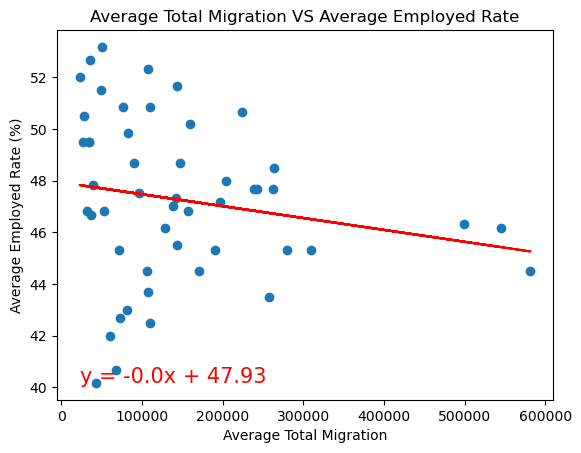

The r-value is: -0.18522171871992268
The p-value is: 0.19782779538438497


In [17]:
# create plot that show the correlation of migration and employment rate
linear_regression(x_value = avg_by_state_df2["Average Total Migration"], y_value = avg_by_state_df2["Average Employed Rate (%)"], xlabel = "Average Total Migration", ylabel = "Average Employed Rate (%)", title="Average Total Migration VS Average Employed Rate", outputname = "Average Total Migration VS Average Employed Rate")



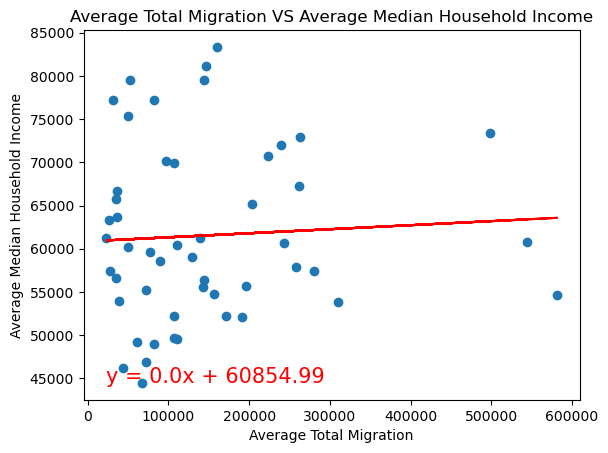

The r-value is: 0.0593554745173882
The p-value is: 0.6822077337202334


In [18]:
# create plot that show the correlation of migration and poverty
linear_regression(x_value = avg_by_state_df2["Average Total Migration"], y_value = avg_by_state_df2["Average Median Household Income"], xlabel = "Average Total Migration", ylabel = "Average Median Household Income", title="Average Total Migration VS Average Median Household Income", outputname = "Average Total Migration VS Average Median Household Income")

